Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


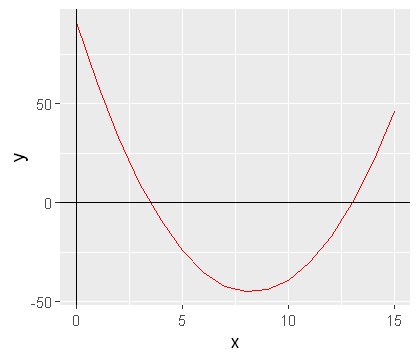

In [1]:
library(ggplot2)
library(repr)
options(repr.plot.width=3.5, repr.plot.height=3) # Set the initial plot area dimensions

## Define the function
f = function(x) 2*x^2 - 33*x + 91

df1 = data.frame(x = seq(0,15))
df1$f = f(df1$x)

ggplot(df1, aes(x,f)) +
    geom_line(color = 'red') + geom_hline(yintercept=0) + geom_vline(xintercept=0) + ylab('y')

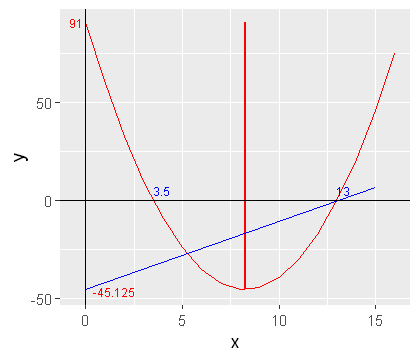

In [45]:
plot_parabola = function(a, b, c){
    # get the x value for the line of symmetry
    vx = (-1*b)/(2*a)
    
    # get the y value when x is at the line of symmetry
    vy = a*vx^2 + b*vx + c

    # Create a dataframe with an x column containing values from x-8 to x+8
    minx = as.integer(vx - 8)
    maxx = as.integer(vx + 8)
    df = data.frame(x = seq(minx, maxx))
    
    # Add a y column by applying the quadratic equation to x
    df$y = a*df$x^2 + b*df$x + c

    # get min and max y values
    miny = min(df$y)
    maxy = max(df$y)
    
    ## data frame for line of symmetry
    symmetry = data.frame(sx = c(vx,vx), sy = c(miny,maxy))
    
    ## data frame for limits
    xlims = data.frame(x = c(3.5,13), y = c(0,0))
        
    ## Create data frame with end points of tangent line
    df1 = data.frame(x = c(0,15), 
                     y = c(361/104*0 - 45.125, 361/104*15 - 45.125))
    
    ## Data frame for shaded area polygon
    shade2 = data.frame(x = c(seq(0,3), 3, 0))
    shade2$y = c(f(shade2$x[1:4]), 0, 0)
    
    ## Plot the parabola
    ggplot(df, aes(x,y)) + 
           geom_line(color = 'red') +
           geom_line(data = symmetry, aes(sx,sy), color = 'red', size = 0.8) +    
           geom_text(data = xlims, aes(label=c('3.5','13')),hjust=0, vjust=-0.5, color = 'blue', size = 2.5) +
           annotate("text", x = -0.5, y = 91, label = paste('91'), color = 'red', size = 2.5) +
           geom_line(data = df1, aes(x,y), color = 'blue') +
           annotate("text", x = 1.5, y = -46.5, label = paste('-45.125'), color = 'red', size = 2.5) +
           geom_hline(yintercept=0) + geom_vline(xintercept=0)
    }

plot_parabola(2, -33, 91)   

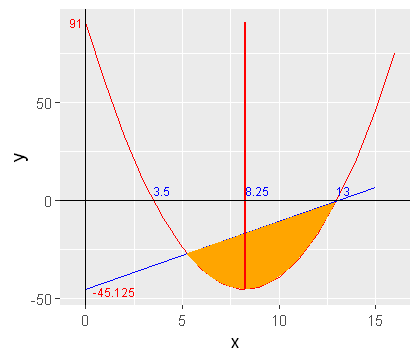

In [3]:
plot_parabola = function(a, b, c){
    # get the x value for the line of symmetry
    vx = (-1*b)/(2*a)
    
    # get the y value when x is at the line of symmetry
    vy = a*vx^2 + b*vx + c

    # Create a dataframe with an x column containing values from x-8 to x+8
    minx = as.integer(vx - 8)
    maxx = as.integer(vx + 8)
    df = data.frame(x = seq(minx, maxx))
    
    # Add a y column by applying the quadratic equation to x
    df$y = a*df$x^2 + b*df$x + c

    # get min and max y values
    miny = min(df$y)
    maxy = max(df$y)
    
    ## data frame for line of symmetry
    symmetry = data.frame(sx = c(vx,vx), sy = c(miny,maxy))
    
    ## data frame for limits
    xlims = data.frame(x = c(3.5,8.25,13), y = c(0,0,0))
        
    ## Create data frame with the linear line 45.125/13*x - 45.125
    df1 = data.frame(x = c(0,15), 
                     y = c(45.125/13*0 - 45.125, 45.125/13*15 - 45.125))
    
    ## define the linear equation
    linear.line <- function (x) {
        return (45.125 * (x/13 -1))
    }
    
    ## solving for the two intersections
    coff = 2
    a <- coff
    b <- - coff * 2 * 8.25 - 45.125/13
    c <- coff * 8.25 * 8.25
    root <- sqrt(b*b - 4*a*c)
    inter1 <- (-b-root)/(2*a)
    inter2 <- (-b+root)/(2*a)
    inter1.y <- linear.line(inter1)
    inter2.y <- linear.line(inter2)
    
    ## define the points that form the polygon
    quadratic <- function(x) {
        diff <- x - 8.25
        return (coff * diff * diff - 45.125)
    }
    
    ## define the polygon
    area.x <- seq(inter1, inter2, 0.01)
    area.y <- unlist(lapply(area.x, quadratic))
    
    area <- data.frame(area.x=area.x, area.y=area.y)
    
    ## Plot the parabola
    ggplot(df, aes(x,y)) + 
           geom_line(color = 'red') +
           geom_text(data = xlims, aes(label=c('3.5','8.25','13')),hjust=0, vjust=-0.5, color = 'blue', size = 2.5) +
           annotate("text", x = -0.5, y = 91, label = paste('91'), color = 'red', size = 2.5) +
           geom_line(data = df1, aes(x,y), color = 'blue') +
           annotate("text", x = 1.5, y = -46.5, label = paste('-45.125'), color = 'red', size = 2.5) +
           geom_polygon(data=area, aes(area.x, area.y), fill = "orange") +
           geom_line(data = symmetry, aes(sx,sy), color = 'red', size = 0.8) +
           geom_hline(yintercept=0) + geom_vline(xintercept=0)
    }

plot_parabola(2, -33, 91)   

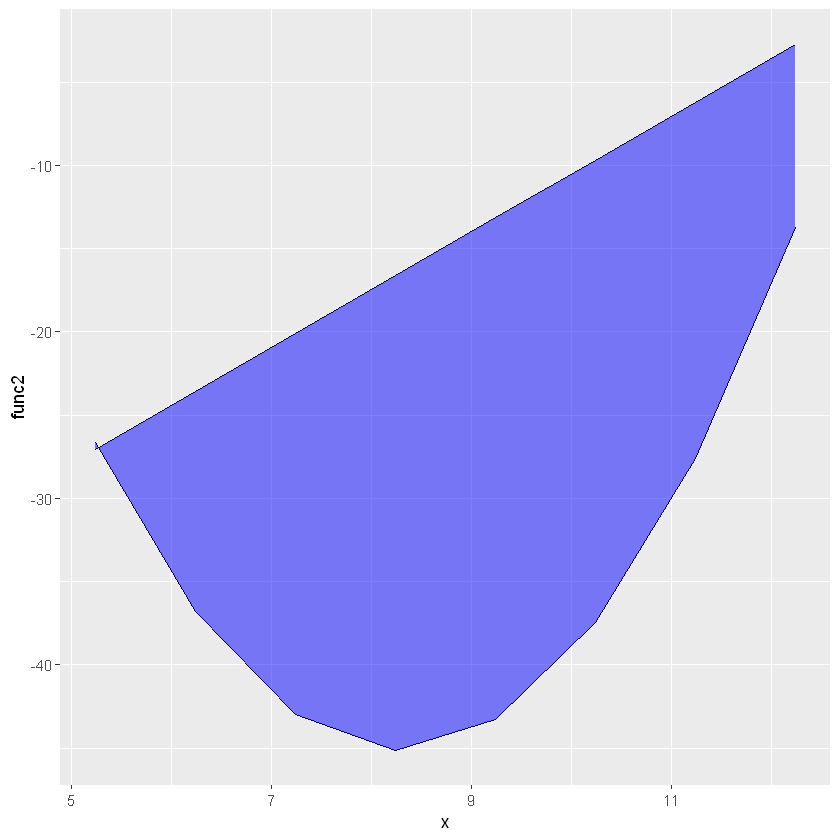

In [52]:
mydata = data.frame(x=c(5.2408:13.01),
                    func1 = sapply(mydata$x, FUN = function(x){2*x^2 - 33*x + 91}),
                    func2 = sapply(mydata$x, FUN = function(x){361/104*x - 45.125}))

ggplot(mydata, aes(x=x, y = func2)) +
  geom_line(aes(y = func1)) + 
  geom_line(aes(y = func2)) + 
  geom_ribbon(aes(ymin = func2, ymax = func1), fill = "blue", alpha = .5)

In [5]:
# create plot object with loess regression lines
g1 <- ggplot(df) + 
  stat_smooth(aes(x = x, y = ymin, colour = "min"), method = "loess", se = FALSE) +
  stat_smooth(aes(x = x, y = ymax, colour = "max"), method = "loess", se = FALSE)
g1

# build plot object for rendering 
gg1 <- ggplot_build(g1)

# extract data for the loess lines from the 'data' slot
df2 <- data.frame(x = gg1$data[[1]]$x,
                  ymin = gg1$data[[1]]$y,
                  ymax = gg1$data[[2]]$y) 

# use the loess data to add the 'ribbon' to plot 
g1 +
  geom_ribbon(data = df2, aes(x = x, ymin = ymin, ymax = ymax),
              fill = "grey", alpha = 0.4)

ERROR: Error: You're passing a function as global data.
Have you misspelled the `data` argument in `ggplot()`


In [10]:
mydata <- data.frame(x=c(0:100),
                    func1 = sapply(mydata$x, FUN = function(x){20*sqrt(x)}),
                    func2 = sapply(mydata$x, FUN = function(x){50*sqrt(x)}))

In [51]:
mydata = data.frame(x=c(5.21:13.01))